In [1]:
from pkg_resources import resource_filename
data_dir = resource_filename("gimmemotifs", "../data/examples")

%cd {data_dir}

/home/simon/anaconda3/envs/gimme/lib/python3.6/site-packages/gimmemotifs-0.13.0+35.gfd2d0cc.dirty-py3.6-linux-x86_64.egg/data/examples


In [2]:
from gimmemotifs.motif import Motif,read_motifs

# Read from file
motifs = read_motifs("example.pfm")

for motif in motifs:
    print(motif)

AP1_ATGAsTCAy
CTCF_syGCCmyCTrGTGG


In [3]:
# Read from file to a dictionary
motifs = read_motifs("example.pfm", as_dict=True)
print(motifs)

{'AP1': AP1_ATGAsTCAy, 'CTCF': CTCF_syGCCmyCTrGTGG}


In [4]:
# Read any motif database included with gimmemotifs by name
motifs = read_motifs("JASPAR2018_vertebrates")
print(len(motifs))
print(motifs[0].to_pwm())

579
>MA0004.1_Arnt
0.2000	0.7999	0.0000	0.0000
0.9499	0.0000	0.0500	0.0000
0.0000	0.9999	0.0000	0.0000
0.0000	0.0000	0.9999	0.0000
0.0000	0.0000	0.0000	0.9999
0.0000	0.0000	0.9999	0.0000


In [5]:
# Create from scratch
m = Motif([[0,1,0,0],[0,0,1,0]])
m.id = "CpG"
print(m)

CpG_CG


In [6]:
# Or from a consensus sequence
from gimmemotifs.motif import motif_from_consensus
ap1 = motif_from_consensus("TGASTCA")
print(ap1.to_pwm())

>TGASTCA
0.0001	0.0001	0.0001	0.9998
0.0001	0.0001	0.9998	0.0001
0.9998	0.0001	0.0001	0.0001
0.0001	0.4999	0.4999	0.0001
0.0001	0.0001	0.0001	0.9998
0.0001	0.9998	0.0001	0.0001
0.9998	0.0001	0.0001	0.0001


Read motifs from files in other formats.


In [7]:
with open("MA0099.3.jaspar") as f:
    motifs = read_motifs(f, fmt="jaspar")
print(motifs[0])

MA0099.3	FOS::JUN_ATGAGTCAyn


You can convert a motif to several formats.


In [8]:
with open("example.pfm") as f:
    motifs = read_motifs(f)

# pwm
print(motifs[0].to_pwm())

>AP1
0.5558	0.1469	0.2734	0.0240
0.0020	0.0015	0.0017	0.9948
0.0039	0.0019	0.9502	0.0439
0.9697	0.0220	0.0018	0.0065
0.0377	0.3311	0.6030	0.0283
0.0033	0.0031	0.0043	0.9893
0.0188	0.9775	0.0023	0.0014
0.9951	0.0021	0.0012	0.0015
0.0121	0.3096	0.1221	0.5561


In [9]:
# pfm
print(motifs[0].to_pfm())

>AP1
555.8	146.9	273.4	24.0
2.0	1.5	1.7	994.8000000000001
3.9	1.9	950.2	43.9
969.7	22.0	1.8	6.5
37.699999999999996	331.1	603.0	28.299999999999997
3.3	3.1	4.3	989.3
18.8	977.5	2.3	1.4
995.1	2.1	1.2	1.5
12.1	309.59999999999997	122.1	556.1


In [10]:
# consensus sequence
print(motifs[0].to_consensus())

ATGAsTCAy


In [11]:
# TRANSFAC
print(motifs[0].to_transfac())

DE	AP1	unknown
0	555	146	273	24	A
1	2	1	1	994	T
2	3	1	950	43	G
3	969	22	1	6	A
4	37	331	603	28	s
5	3	3	4	989	T
6	18	977	2	1	C
7	995	2	1	1	A
8	12	309	122	556	y
XX


In [12]:
# MEME
print(motifs[0].to_meme())

MOTIF AP1
BL   MOTIF AP1 width=0 seqs=0
letter-probability matrix: alength= 4 w= 9 nsites= 1000.1 E= 0
0.5558	0.1469	0.2734	0.024
0.002	0.0015	0.0017	0.9948
0.0039	0.0019	0.9502	0.0439
0.9697	0.022	0.0018	0.0065
0.0377	0.3311	0.603	0.0283
0.0033	0.0031	0.0043	0.9893
0.0188	0.9775	0.0023	0.0014
0.9951	0.0021	0.0012	0.0015
0.0121	0.3096	0.1221	0.5561


Some other useful tidbits.

In [13]:
m = motif_from_consensus("NTGASTCAN")
print(len(m))

9


In [14]:
# Trim by information content
m.trim(0.5)
print(m.to_consensus(), len(m))

TGAsTCA 7


In [15]:
# Slices
print(m[:3].to_consensus())

TGA


In [16]:
# Shuffle
random_motif = motif_from_consensus("NTGASTGAN").randomize()
print(random_motif)

random_sGTAnATGn


To convert a motif to an image, use `to_img()`. Supported formats are png, ps and pdf.

In [17]:
m = motif_from_consensus("NTGASTCAN")
m.to_img("ap1.png", fmt="png")

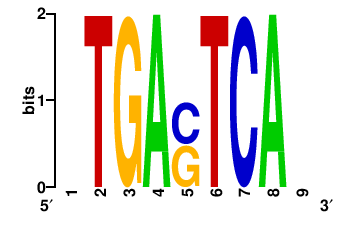

In [18]:
from IPython.display import Image
Image("ap1.png")

# Motif scanning

For very simple scanning, you can just use a Motif instance. Let’s say we have a FASTA file called `test.small.fa` that looks like this:

```
>seq1
AAAAAAAAAAAAAAAAAAAAAA
>seq2
CGCGCGTGAGTCACGCGCGCGCG
>seq3
TGASTCAAAAAAAAAATGASTCA
```

Now we can use this file for scanning.

In [19]:
from gimmemotifs.motif import motif_from_consensus
from gimmemotifs.fasta import Fasta

f = Fasta("test.small.fa")
m = motif_from_consensus("TGAsTCA")

m.pwm_scan(f)

{'seq1': [], 'seq2': [6, 6], 'seq3': [0, 16, 0, 16]}

This return a dictionary with the sequence names as keys. The value is a list with positions where the motif matches. Here, as the AP1 motif is a palindrome, you see matches on both forward and reverse strand. This is more clear when we use `pwm_scan_all()` that returns position, score and strand for every match.

In [20]:
m.pwm_scan_all(f)

{'seq1': [],
 'seq2': [(6, 9.02922042678255, 1), (6, 9.02922042678255, -1)],
 'seq3': [(0, 8.331251500673487, 1),
  (16, 8.331251500673487, 1),
  (0, 8.331251500673487, -1),
  (16, 8.331251500673487, -1)]}

The number of matches to return is set to 50 by default, you can control this by setting the `nreport` argument. Use `scan_rc=False` to only scan the forward orientation.


In [21]:
m.pwm_scan_all(f, nreport=1, scan_rc=False)

{'seq1': [],
 'seq2': [(6, 9.02922042678255, 1)],
 'seq3': [(0, 8.331251500673487, 1)]}

While this functionality works, it is not very efficient. To scan many motifs in potentially many sequences, use the functionality in the `scanner` module. If you only want the best match per sequence, there is a utility function called `scan_to_best_match`, otherwise, use the `Scanner` class.

In [22]:
from gimmemotifs.motif import motif_from_consensus
from gimmemotifs.scanner import scan_to_best_match

m1 = motif_from_consensus("TGAsTCA")
m1.id = "AP1"
m2 = motif_from_consensus("CGCG")
m2.id = "CG"
motifs = [m1, m2]

print("motif\tpos\tscore")
result = scan_to_best_match("test.small.fa", motifs)
for motif, matches in result.items():
    for match in matches:
        print("{}\t{}\t{}".format(motif, match[1], match[0]))


motif	pos	score
AP1	0	-20.052563923836903
AP1	6	9.029486018303187
AP1	0	8.331550321011443
CG	0	-18.26379789133924
CG	0	5.554366880674296
CG	0	-7.743307225501047


The matches are in the same order as the sequences in the original file.

While this function can be very useful, a Scanner instance is much more flexible. You can scan different input formats (BED, FASTA, regions), and control the thresholds and output.

As an example we will use the file `Gm12878.CTCF.top500.w200.fa` that contains 500 top CTCF peaks. We will get the CTCF motif and scan this file in a number of different ways.


In [24]:
from gimmemotifs.motif import default_motifs
from gimmemotifs.scanner import Scanner
from gimmemotifs.fasta import Fasta
import numpy as np

# Input file
fname = "Gm12878.CTCF.top500.w200.fa"

# Select the CTCF motif from the default motif database
motifs = [m for m in default_motifs() if "CTCF" in m.factors['direct']][:1]

# Initialize the scanner
s = Scanner()
s.set_motifs(motifs)

Now let’s get the best score for the CTCF motif for each sequence.

In [25]:
scores = [r[0] for r in s.best_score("Gm12878.CTCF.top500.w200.fa")]
print("{}\t{:.2f}\t{:.2f}\t{:.2f}".format(
    len(scores),
    np.mean(scores),
    np.min(scores),
    np.max(scores)
    ))

500	11.00	1.45	15.07


In many cases you’ll want to set a threshold. In this example we’ll use a 1% FPR threshold, based on scanning randomly selected sequences from the hg38 genome. The first time you run this, it will take a while. However, the tresholds will be cached. This means that for the same combination of motifs and genome, the previously generated threshold will be used.


In [26]:
# Set a 1% FPR threshold based on random hg38 sequence
s.set_genome("hg38")
s.set_threshold(fpr=0.01)

# get the number of sequences with at least one match
counts = [n[0] for n in s.count("Gm12878.CTCF.top500.w200.fa", nreport=1)]
print(counts[:10])

2018-12-05 02:18:08,850 - INFO - Using default background: genome hg38 with length 200
2018-12-05 02:18:08,853 - INFO - Using background: genome hg38 with length 200


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [27]:
# or the grand total of number of sequences with 1 match
print(s.total_count("Gm12878.CTCF.top500.w200.fa", nreport=1))

[414]


In [28]:
# Scanner.scan() just gives all information
seqs = Fasta("Gm12878.CTCF.top500.w200.fa")[:10]
for i,result in enumerate(s.scan(seqs)):
    seqname = seqs.ids[i]
    for m,matches in enumerate(result):
        motif = motifs[m]
        for score, pos, strand in matches:
            print(seqname, motif, score, pos, strand)

chr11:190037-190237 GM.5.0.C2H2_ZF.0024_syGCCmyCTrGTGG 11.987579910503003 142 1
chr11:190037-190237 GM.5.0.C2H2_ZF.0024_syGCCmyCTrGTGG 9.366964008790466 21 1
chr11:190037-190237 GM.5.0.C2H2_ZF.0024_syGCCmyCTrGTGG 9.049239042402315 81 1
chr14:106873577-106873777 GM.5.0.C2H2_ZF.0024_syGCCmyCTrGTGG 15.066074431157894 119 1
chr14:106873577-106873777 GM.5.0.C2H2_ZF.0024_syGCCmyCTrGTGG 14.695942248831264 82 1
chr14:106873577-106873777 GM.5.0.C2H2_ZF.0024_syGCCmyCTrGTGG 12.362503901152305 26 1
chr14:106873577-106873777 GM.5.0.C2H2_ZF.0024_syGCCmyCTrGTGG 9.885395021504959 158 1
chr14:106873577-106873777 GM.5.0.C2H2_ZF.0024_syGCCmyCTrGTGG 9.035150927051049 100 1
chr14:106873577-106873777 GM.5.0.C2H2_ZF.0024_syGCCmyCTrGTGG 8.943385403326214 6 1
chr14:106765204-106765404 GM.5.0.C2H2_ZF.0024_syGCCmyCTrGTGG 15.066074431157894 144 1
chr14:106765204-106765404 GM.5.0.C2H2_ZF.0024_syGCCmyCTrGTGG 14.76300111320958 184 1
chr14:106765204-106765404 GM.5.0.C2H2_ZF.0024_syGCCmyCTrGTGG 14.629818549380293 164 

# Finding de novo motifs

Let’s take the `Gm12878.CTCF.top500.w200.fa` file as example again. For a basic example we’ll just use two motif finders, as they’re quick to run.


In [29]:
from gimmemotifs.denovo import gimme_motifs

peaks = "Gm12878.CTCF.top500.w200.fa"
outdir = "CTCF.gimme"
params = {
    "tools": "Homer,BioProspector",
    "genome": "hg38",
    }

motifs = gimme_motifs(peaks, outdir, params=params)

2018-12-05 02:18:10,850 - INFO - starting full motif analysis
2018-12-05 02:18:10,853 - INFO - preparing input (FASTA)
not enough random sequences found for 0.7000000000000001 <= GC < 0.75 (83 instead of 100)
2018-12-05 02:19:19,484 - INFO - starting motif prediction (medium)
2018-12-05 02:19:19,487 - INFO - tools: BioProspector, Homer
2018-12-05 02:19:20,146 - INFO - all jobs submitted
2018-12-05 02:19:23,902 - INFO - Homer_width_5 finished, found 5 motifs
2018-12-05 02:19:24,247 - INFO - Homer_width_6 finished, found 5 motifs
2018-12-05 02:19:25,217 - INFO - Homer_width_7 finished, found 5 motifs
2018-12-05 02:19:26,671 - INFO - Homer_width_8 finished, found 5 motifs
2018-12-05 02:19:28,930 - INFO - Homer_width_9 finished, found 5 motifs
2018-12-05 02:19:29,602 - INFO - Homer_width_10 finished, found 5 motifs
2018-12-05 02:19:30,393 - INFO - BioProspector_width_5 finished, found 5 motifs
2018-12-05 02:19:30,642 - INFO - BioProspector_width_6 finished, found 5 motifs
2018-12-05 02:19:

This will basically run the same pipeline as the `gimme motifs` command. All output files will be stored in outdir and `gimme_motifs` returns a `list` of `Motif` instances. If you only need the motifs but not the graphical report, you can decide to skip it by setting `create_report` to `False`. Additionally, you can choose to skip clustering (`cluster=False`) or to skip calculation of significance (`filter_significant=False`). For instance, the following command will only predict motifs and cluster them.


In [30]:
motifs = gimme_motifs(peaks, outdir,
    params=params, filter_significant=False, create_report=False)

2018-12-05 02:22:17,889 - INFO - starting full motif analysis
2018-12-05 02:22:17,893 - INFO - preparing input (FASTA)
not enough random sequences found for 0.7000000000000001 <= GC < 0.75 (271 instead of 290)
2018-12-05 02:22:47,000 - INFO - starting motif prediction (medium)
2018-12-05 02:22:47,002 - INFO - tools: BioProspector, Homer
2018-12-05 02:22:47,928 - INFO - all jobs submitted
2018-12-05 02:22:51,852 - INFO - Homer_width_5 finished, found 5 motifs
2018-12-05 02:22:52,728 - INFO - Homer_width_7 finished, found 5 motifs
2018-12-05 02:22:53,196 - INFO - Homer_width_6 finished, found 5 motifs
2018-12-05 02:22:54,898 - INFO - Homer_width_8 finished, found 5 motifs
2018-12-05 02:22:56,287 - INFO - Homer_width_9 finished, found 5 motifs
2018-12-05 02:22:57,110 - INFO - Homer_width_10 finished, found 5 motifs
2018-12-05 02:22:58,226 - INFO - BioProspector_width_5 finished, found 5 motifs
2018-12-05 02:22:59,184 - INFO - BioProspector_width_6 finished, found 5 motifs
2018-12-05 02:23

All parameters for motif finding are set by the `params` argument

Although the `gimme_motifs` function is probably the easiest way to run the `de novo` finding tools, you can also run any of the tools directly. In this case you would also have to supply the background file if the specific tool requires it.

In [31]:
from gimmemotifs.tools import get_tool
from gimmemotifs.background import MatchedGcFasta

m = get_tool("homer")  # tool name is case-insensitive

# Create a background fasta file with a similar GC%
fa = MatchedGcFasta("TAp73alpha.fa", number=1000)
fa.writefasta("bg.fa")

# Run motif prediction
params = {
    "background": "bg.fa",
    "width": "20",
    "number": 5,
}

motifs, stdout, stderr = m.run("TAp73alpha.fa", params=params)
print(motifs[0].to_consensus())

nnnCnTGynnnGrCwTGyyn


# Motif statistics

With some motifs, a sample file and a background file you can calculate motif statistics. Let’s say I wanted to know which of the p53-family motifs is most enriched in the file TAp73alpha.fa.

First, we’ll generate a GC%-matched genomic background. Then we only select p53 motifs.


In [32]:
from gimmemotifs.background import MatchedGcFasta
from gimmemotifs.fasta import Fasta
from gimmemotifs.stats import calc_stats
from gimmemotifs.motif import default_motifs

sample = "TAp73alpha.fa"
bg = MatchedGcFasta(sample, genome="hg19", number=1000)

motifs = [m for m in default_motifs() if any(f in m.factors['direct'] for f in ["TP53", "TP63", "TP73"])]

stats = calc_stats(motifs, sample, bg)

print("Stats for", motifs[0])
for k, v in stats[str(motifs[0])].items():
    print(k,v)

print()

best_motif = sorted(motifs, key=lambda x: stats[str(x)]["recall_at_fdr"])[-1]
print("Best motif (recall at 10% FDR):", best_motif)

Stats for GM.5.0.p53.0001_rCATGyCCnGrCATGy
recall_at_fdr 0.833
fraction_fpr 0.416
score_at_fpr 9.05025905735
enr_at_fpr 41.6
max_enrichment 55.5
phyper_at_fpr 3.33220067463e-132
mncp 1.85474606318
roc_auc 0.9211925
roc_auc_xlim 0.0680115
pr_auc 0.927368602993
max_fmeasure 0.867519181586
ks_pvalue 0.0
ks_significance inf

Best motif (recall at 10% FDR): GM.5.0.p53.0001_rCATGyCCnGrCATGy


A lot of statistics are generated and you will not always need all of them. You can choose one or more specific metrics with the additional `stats` argument.


In [33]:
metrics = ["roc_auc", "recall_at_fdr"]
stats = calc_stats(motifs, sample, bg, stats=metrics)

for metric in metrics:
    for motif in motifs:
        print("{}\t{}\t{:.2f}".format(
            motif.id, metric, stats[str(motif)][metric]
            ))

GM.5.0.p53.0001	roc_auc	0.92
GM.5.0.p53.0003	roc_auc	0.89
GM.5.0.p53.0004	roc_auc	0.91
GM.5.0.p53.0005	roc_auc	0.86
GM.5.0.p53.0006	roc_auc	0.80
GM.5.0.p53.0007	roc_auc	0.87
GM.5.0.p53.0008	roc_auc	0.82
GM.5.0.p53.0010	roc_auc	0.80
GM.5.0.p53.0011	roc_auc	0.85
GM.5.0.p53.0001	recall_at_fdr	0.83
GM.5.0.p53.0003	recall_at_fdr	0.64
GM.5.0.p53.0004	recall_at_fdr	0.74
GM.5.0.p53.0005	recall_at_fdr	0.58
GM.5.0.p53.0006	recall_at_fdr	0.19
GM.5.0.p53.0007	recall_at_fdr	0.66
GM.5.0.p53.0008	recall_at_fdr	0.18
GM.5.0.p53.0010	recall_at_fdr	0.20
GM.5.0.p53.0011	recall_at_fdr	0.53


# Motif comparison

In [34]:
from gimmemotifs.comparison import MotifComparer
from gimmemotifs.motif import motif_from_consensus
from gimmemotifs.motif import read_motifs

Compare two motifs

In [36]:
m1 = motif_from_consensus("RRRCATGYYY")
m2 = motif_from_consensus("TCRTGT")

mc = MotifComparer()
score, pos, orient = mc.compare_motifs(m1, m2)

if orient == -1:
    m2 = m2.rc()
pad1, pad2 = "", ""
if pos < 0:
    pad1 = " " * -pos 
elif pos > 0:
    pad2 =" " * pos
print(pad1 + m1.to_consensus())
print(pad2 + m2.to_consensus())

rrrCATGyyy
  ACAyGA


Find closest match in a motif database

In [37]:
motifs = [
    motif_from_consensus("GATA"),
    motif_from_consensus("NTATAWA"),
    motif_from_consensus("ACGCG"),
]

mc = MotifComparer()
results = mc.get_closest_match(motifs, dbmotifs=read_motifs("HOMER"), metric="seqcor")

# Load motifs
db = read_motifs("HOMER", as_dict=True)

for motif in motifs:
    match, scores = results[motif.id]
    print("{}: {} - {:.3f}".format(motif.id, match, scores[0]))
    dbmotif = db[match]
    orient = scores[2]
    if orient == -1:
        dbmotif = dbmotif.rc()
    padm, padd = 0, 0
    if scores[1] < 0:
        padm = -scores[1]
    elif scores[1] > 0:
        padd = scores[1]
    print(" " * padm + motif.to_consensus())
    print(" " * padd + dbmotif.to_consensus())
    print()

GATA: AGATAASR_GATA3(Zf)/iTreg-Gata3-ChIP-Seq(GSE20898)/Homer - 0.823
 GATA
AGATAAnr

NTATAWA: NGYCATAAAWCH_CDX4(Homeobox)/ZebrafishEmbryos-Cdx4.Myc-ChIP-Seq(GSE48254)/Homer - 0.747
  nTATAwA
nnynrTAAAnnn

ACGCG: NCCACGTG_c-Myc(bHLH)/LNCAP-cMyc-ChIP-Seq(Unpublished)/Homer - 0.744
 ACGCG
CACGTGGn

